In [600]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import pickle
import sys   
import numpy as np
# from tensorflow.examples.tutorials.mnist import input_data

In [243]:
sys.getdefaultencoding()

'utf-8'

## Load input data from the pickle file

In [601]:
with (open("Training_feature.pickle",'rb')) as openfile:
    while True:
        try:
            input_data=pickle.load(openfile,encoding='latin1')
        except EOFError:
            break

In [507]:
input_data[0].shape

(808, 2500)

In [602]:
images=input_data[0]
type(images)

numpy.ndarray

In [603]:
newimage=np.reshape(images,(-1,50,50))
newimage[0].shape

(50, 50)

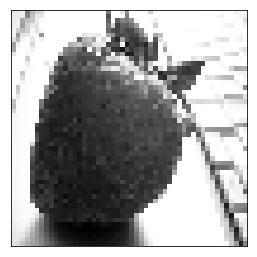

In [604]:
fig = plt.figure(figsize=(50, 20))
for i in range(1):
    ax=fig.add_subplot(4, 5, i+1)
    plt.imshow(newimage[780], interpolation='nearest',cmap=plt.get_cmap('gray'))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show()

#### Initialize the place holders and variables

In [605]:
n_classes = 3
batch_size = 128

x = tf.placeholder('float', [None, 2500])
y = tf.placeholder('float')

# keep_rate = 0.8
keep_prob = tf.placeholder(tf.float32)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [305]:
sess = tf.InteractiveSession()

p=sess.run((tf.reshape(input_data[0], shape=[-1, 50, 50,1])))
(p.shape)

## Defien the network

In [606]:
def convolutional_neural_network(x):
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_fc':tf.Variable(tf.random_normal([13*13*64,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.reshape(x, shape=[-1, 50, 50,1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)
    
    print(conv1.shape)
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)
    print(conv2.shape)
   

    fc = tf.reshape(conv2,[-1, 13*13*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc,keep_prob)

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output,conv1,conv2,weights

## Trainin the network

In [607]:
prediction,conv1,conv2,weights = convolutional_neural_network(x)
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(cost)
    
hm_epochs = 200
sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())
loss=[]
for epoch in range(hm_epochs):
    epoch_loss = 0
    epoch_x=input_data[0]
    epoch_y = input_data[1]
    _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y,keep_prob:0.5})
    loss.append(c)
    epoch_loss += c

    print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',c)


(?, 25, 25, 32)
(?, 13, 13, 64)
Epoch 0 completed out of 200 loss: 6.88286e+07
Epoch 1 completed out of 200 loss: 4.70869e+07
Epoch 2 completed out of 200 loss: 3.62852e+07
Epoch 3 completed out of 200 loss: 3.14985e+07
Epoch 4 completed out of 200 loss: 3.76238e+07
Epoch 5 completed out of 200 loss: 3.75986e+07
Epoch 6 completed out of 200 loss: 3.632e+07
Epoch 7 completed out of 200 loss: 3.02393e+07
Epoch 8 completed out of 200 loss: 2.66216e+07
Epoch 9 completed out of 200 loss: 2.50975e+07
Epoch 10 completed out of 200 loss: 2.47202e+07
Epoch 11 completed out of 200 loss: 2.74193e+07
Epoch 12 completed out of 200 loss: 2.60114e+07
Epoch 13 completed out of 200 loss: 2.5379e+07
Epoch 14 completed out of 200 loss: 2.35813e+07
Epoch 15 completed out of 200 loss: 2.1864e+07
Epoch 16 completed out of 200 loss: 2.11803e+07
Epoch 17 completed out of 200 loss: 1.97547e+07
Epoch 18 completed out of 200 loss: 2.01015e+07
Epoch 19 completed out of 200 loss: 2.01446e+07
Epoch 20 completed out

Epoch 173 completed out of 200 loss: 213929.0
Epoch 174 completed out of 200 loss: 312925.0
Epoch 175 completed out of 200 loss: 374377.0
Epoch 176 completed out of 200 loss: 250671.0
Epoch 177 completed out of 200 loss: 285843.0
Epoch 178 completed out of 200 loss: 236540.0
Epoch 179 completed out of 200 loss: 237624.0
Epoch 180 completed out of 200 loss: 254991.0
Epoch 181 completed out of 200 loss: 251993.0
Epoch 182 completed out of 200 loss: 216699.0
Epoch 183 completed out of 200 loss: 217443.0
Epoch 184 completed out of 200 loss: 218314.0
Epoch 185 completed out of 200 loss: 293313.0
Epoch 186 completed out of 200 loss: 219135.0
Epoch 187 completed out of 200 loss: 193754.0
Epoch 188 completed out of 200 loss: 195112.0
Epoch 189 completed out of 200 loss: 241234.0
Epoch 190 completed out of 200 loss: 200001.0
Epoch 191 completed out of 200 loss: 150561.0
Epoch 192 completed out of 200 loss: 192111.0
Epoch 193 completed out of 200 loss: 161603.0
Epoch 194 completed out of 200 los

## Evaluate acuuracy

In [608]:
correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
print('Accuracy:',accuracy.eval({x:input_data[0], y:input_data[1],keep_prob:1}))


Accuracy: 0.988861


In [610]:
writer=tf.summary.FileWriter('/home/ppatnaik/pradosa/3')
writer.add_graph(sess.graph)

## Plot the loss 

In [536]:
import numpy as np
loss=np.array(loss)


In [417]:
loss1=loss

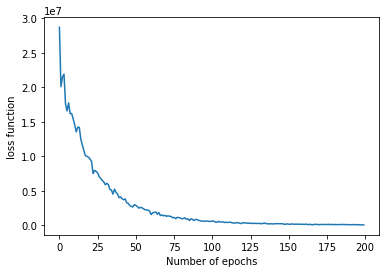

In [537]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Number of epochs')
plt.ylabel('loss function')
plt .show()
# plt.plot(loss1)

In [37]:
w=weights['W_conv1']

In [354]:
print(temp_conv1.shape)

(808, 25, 25, 10)


## Visaulize the weights in the convilutional layer

In [538]:
temp_weights = sess.run(weights, feed_dict={x:input_data[0], y:input_data[1]})

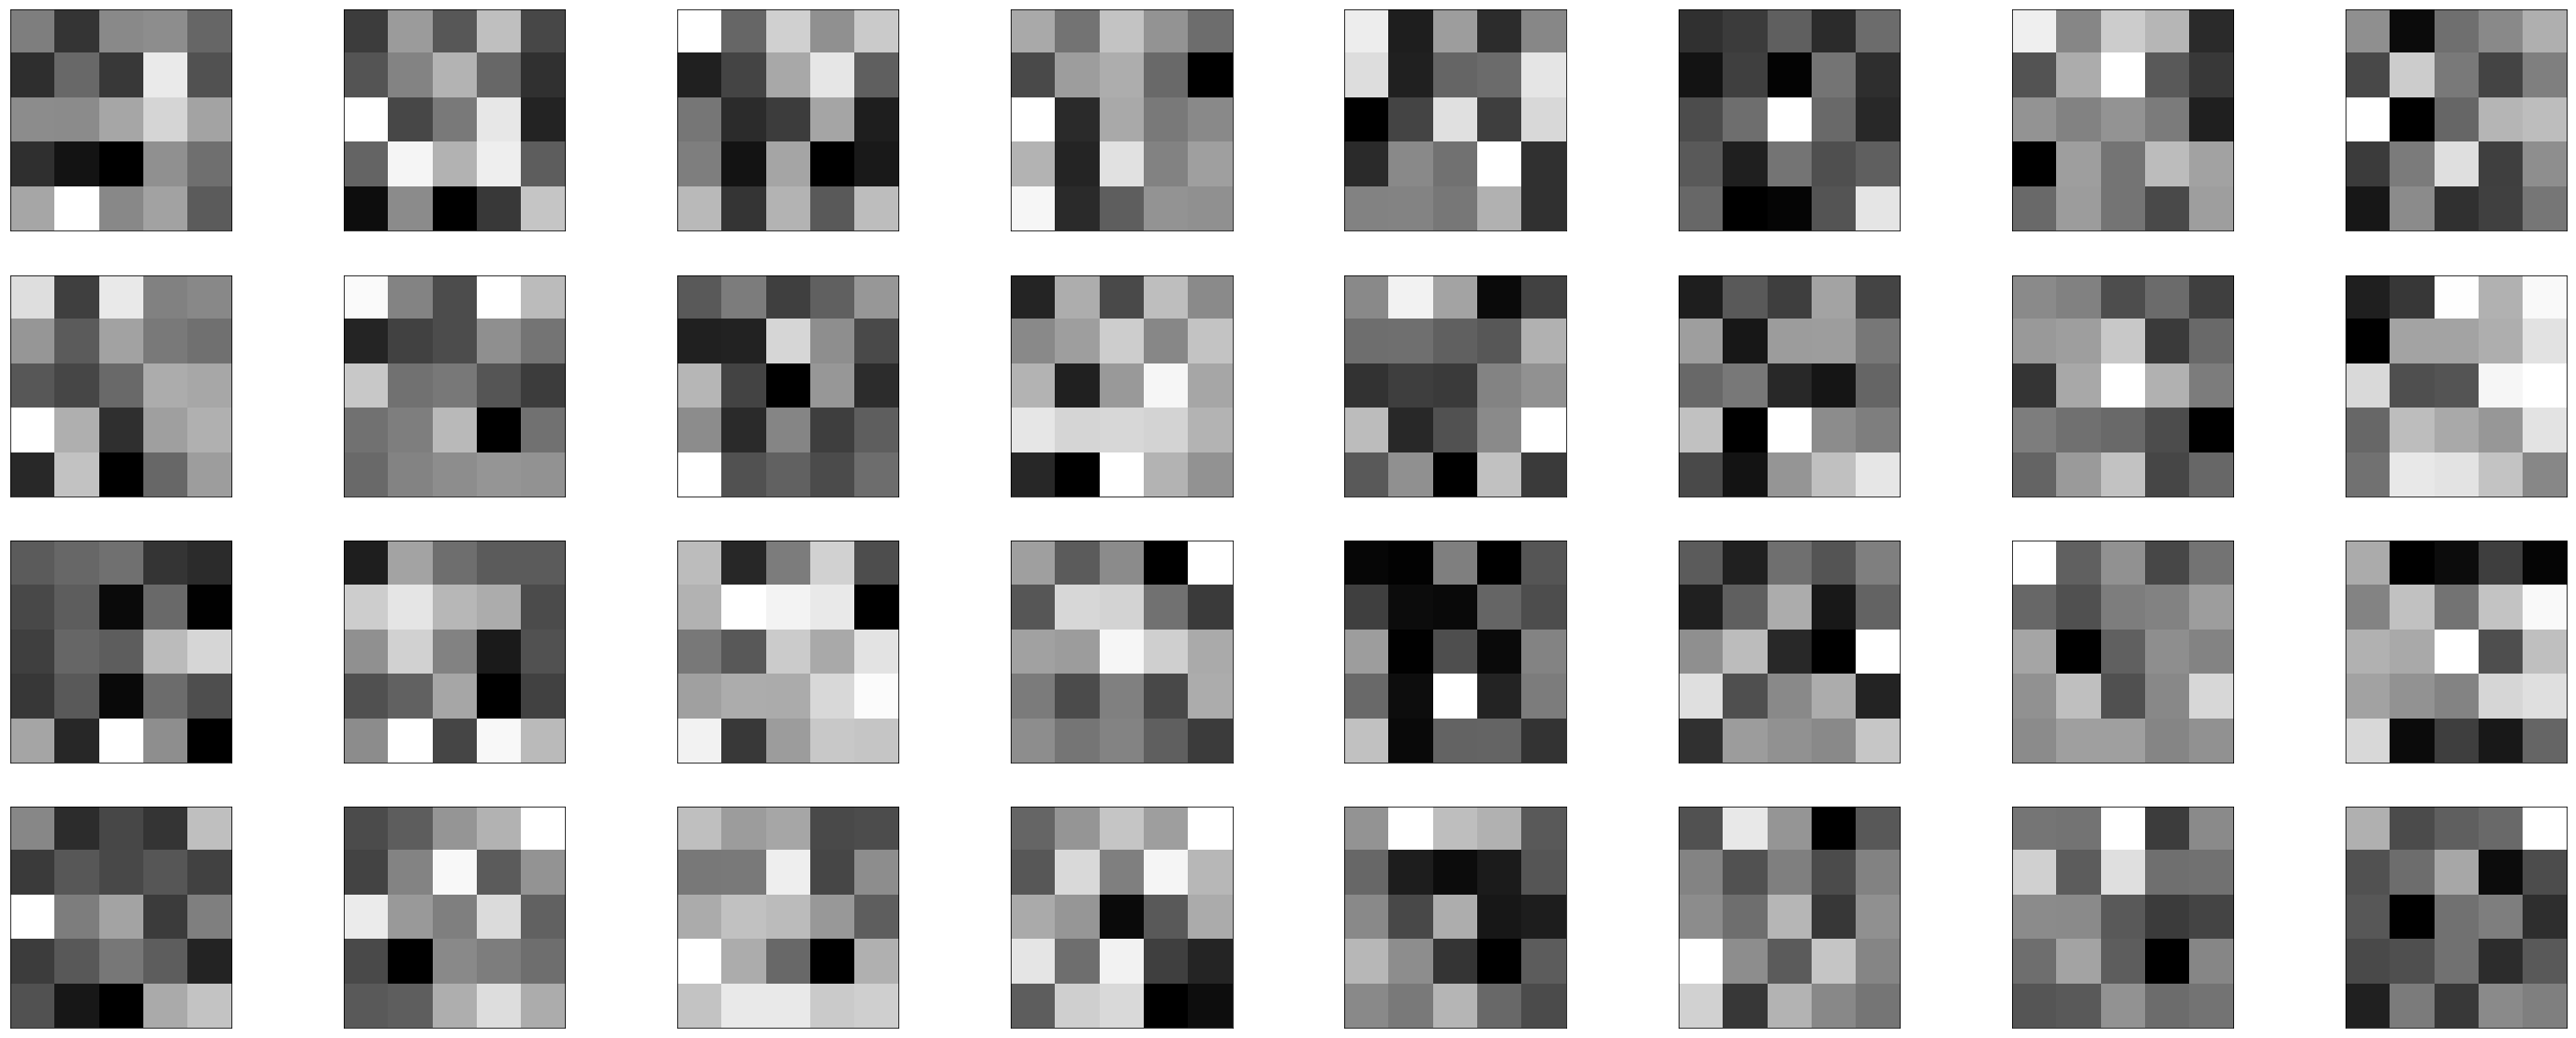

In [555]:
fig = plt.figure(figsize=(50, 20))
for i in range(32):
    ax=fig.add_subplot(4,32/4, i+1)
    w=temp_weights['W_conv1'][:,:,:,i][:,:,0]
    plt.imshow(w, interpolation='nearest',cmap=plt.get_cmap('gray'))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visib le(False)   
plt.show()    

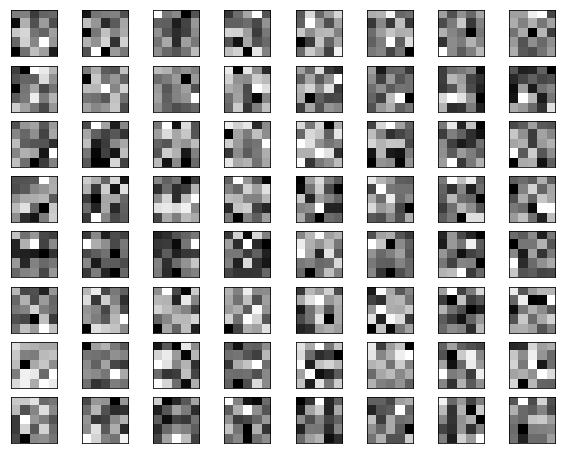

In [550]:
fig = plt.figure(figsize=(10, 10))
for i in range(64):
    ax=fig.add_subplot(10,32/4, i+1)
    w=temp_weights['W_conv2'][:,:,:,i][:,:,0]
    plt.imshow(w, interpolation='nearest',cmap=plt.get_cmap('gray'))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show() 

## Visualize the output of each convlayer

In [551]:
temp_conv1 = sess.run(conv1, feed_dict={x:input_data[0], y:input_data[1]})

In [519]:
temp_conv1.shape

(808, 25, 25, 32)

In [520]:
p=temp_conv1[0,:,:,2]
p.shape

(25, 25)

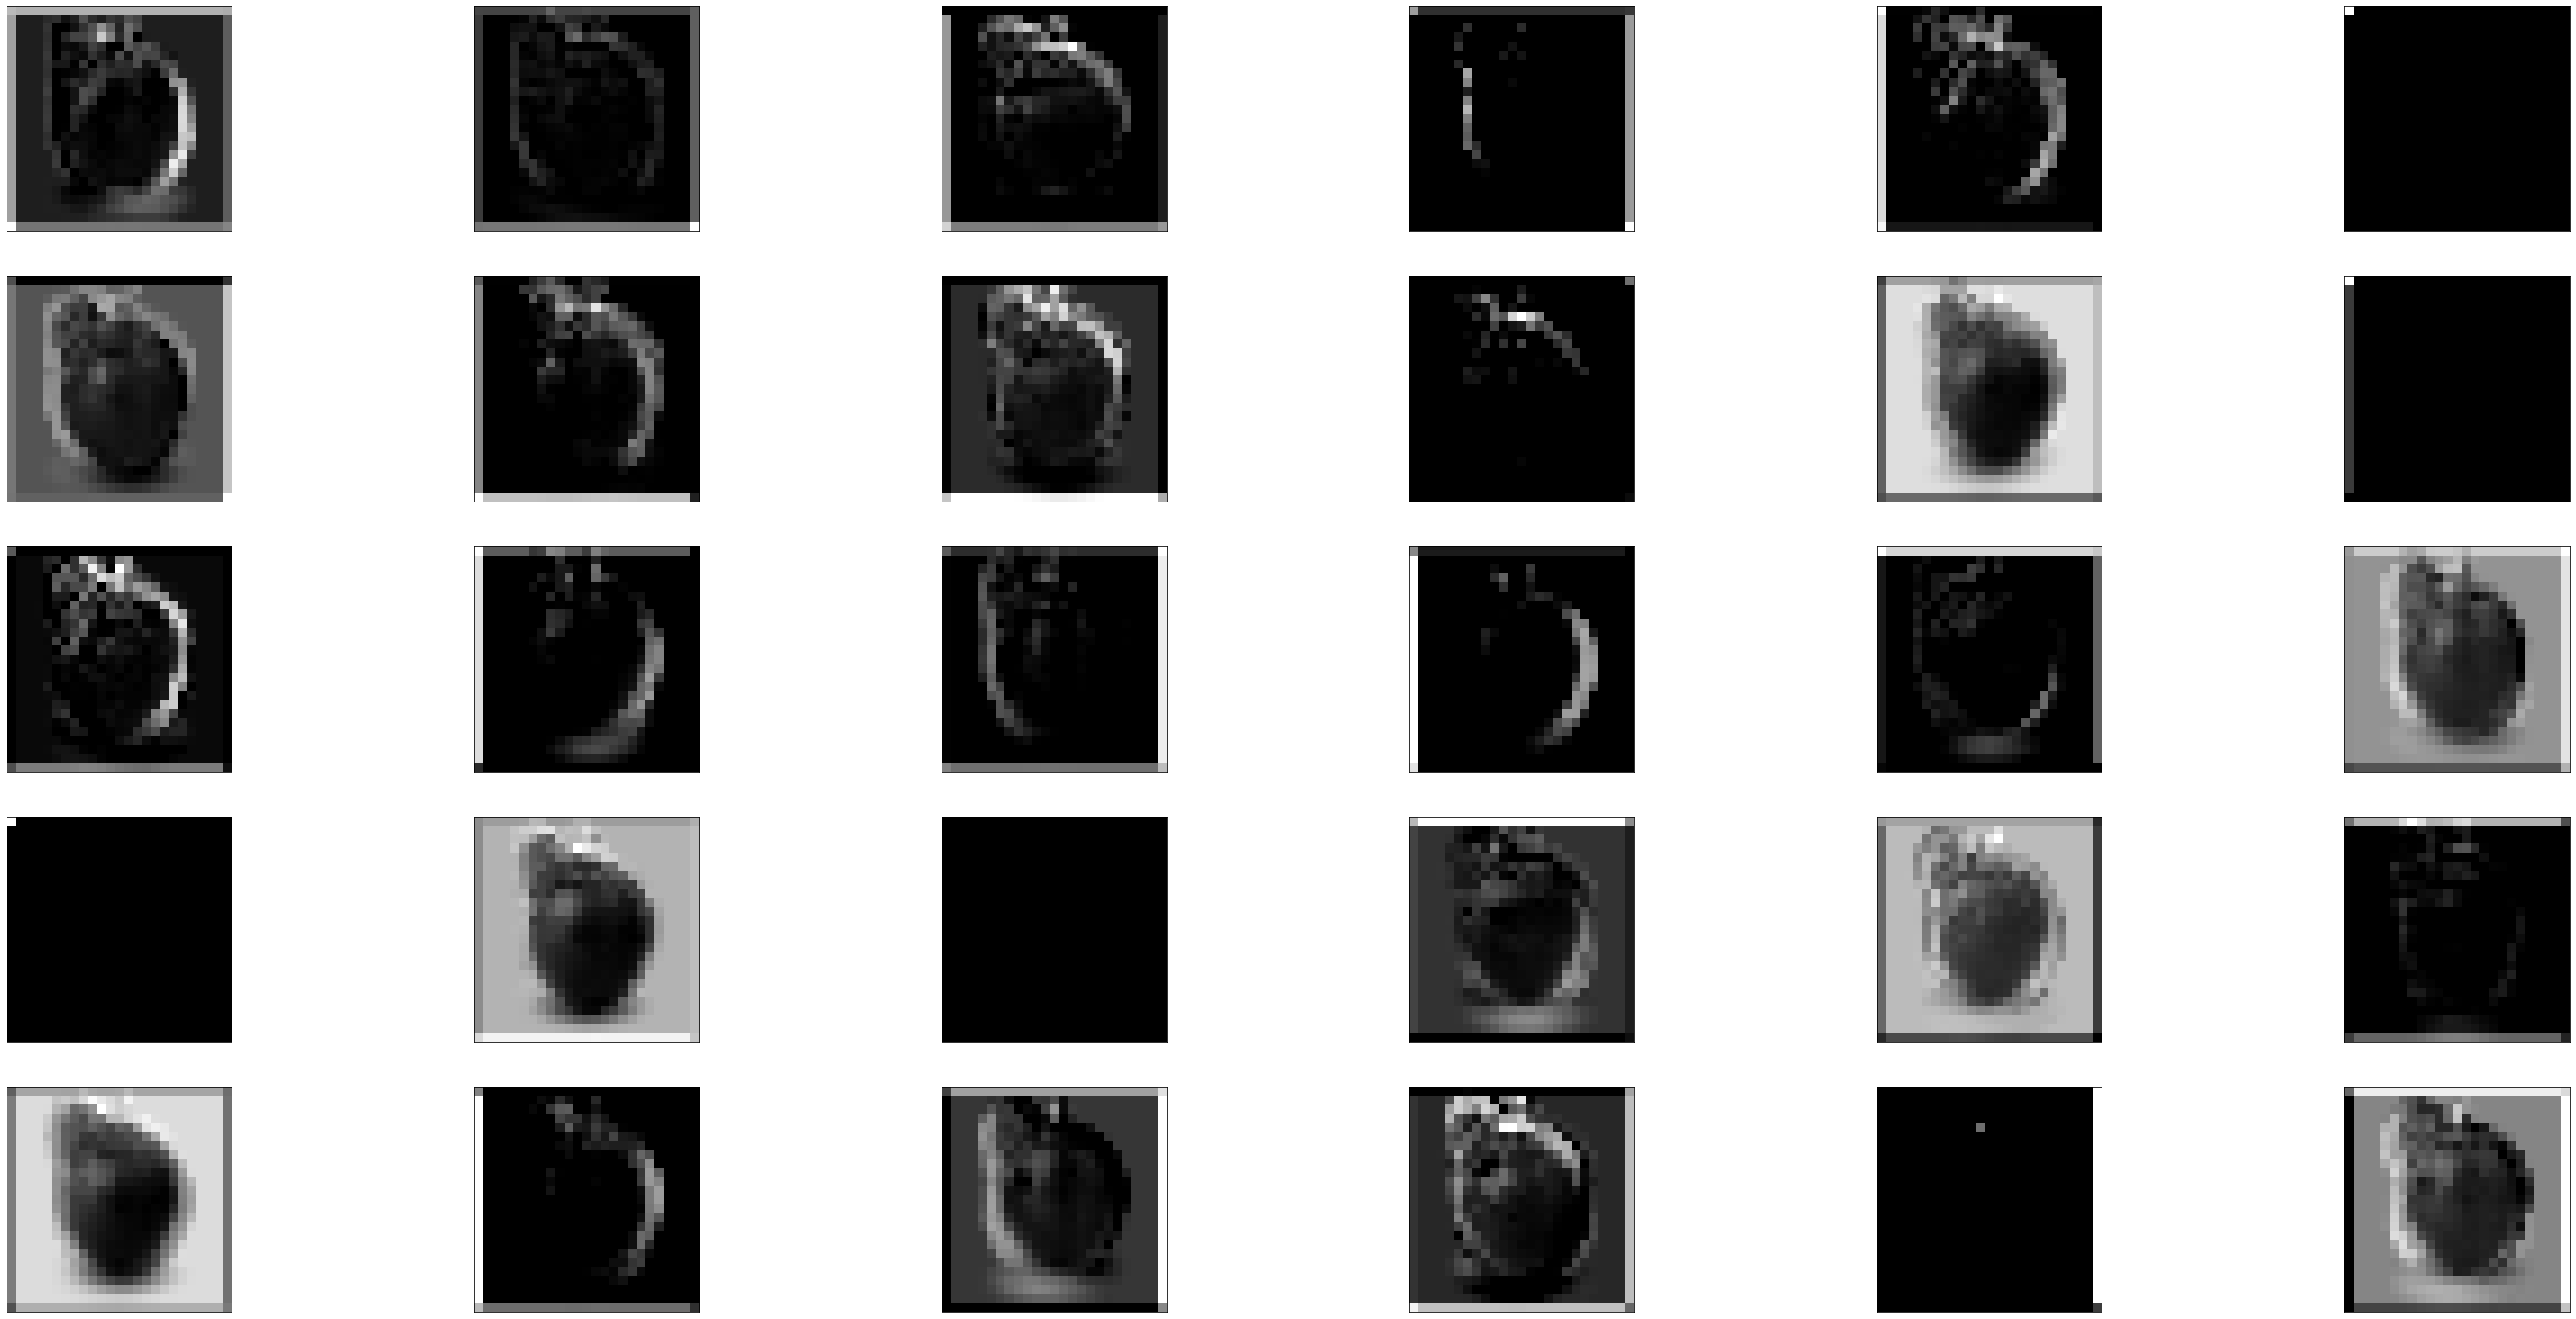

In [552]:
fig = plt.figure(figsize=(80, 80))
for i in range(30):
    ax=fig.add_subplot(10,32/5, i+1)
    p=temp_conv1[0,:,:,i]
    plt.imshow(p, interpolation='nearest',cmap=plt.get_cmap('gray'))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show() 

In [522]:
temp_conv2 = sess.run(conv2, feed_dict={conv1:temp_conv1})

In [523]:
q=temp_conv2[0,:,:,2]
q.shape

(13, 13)

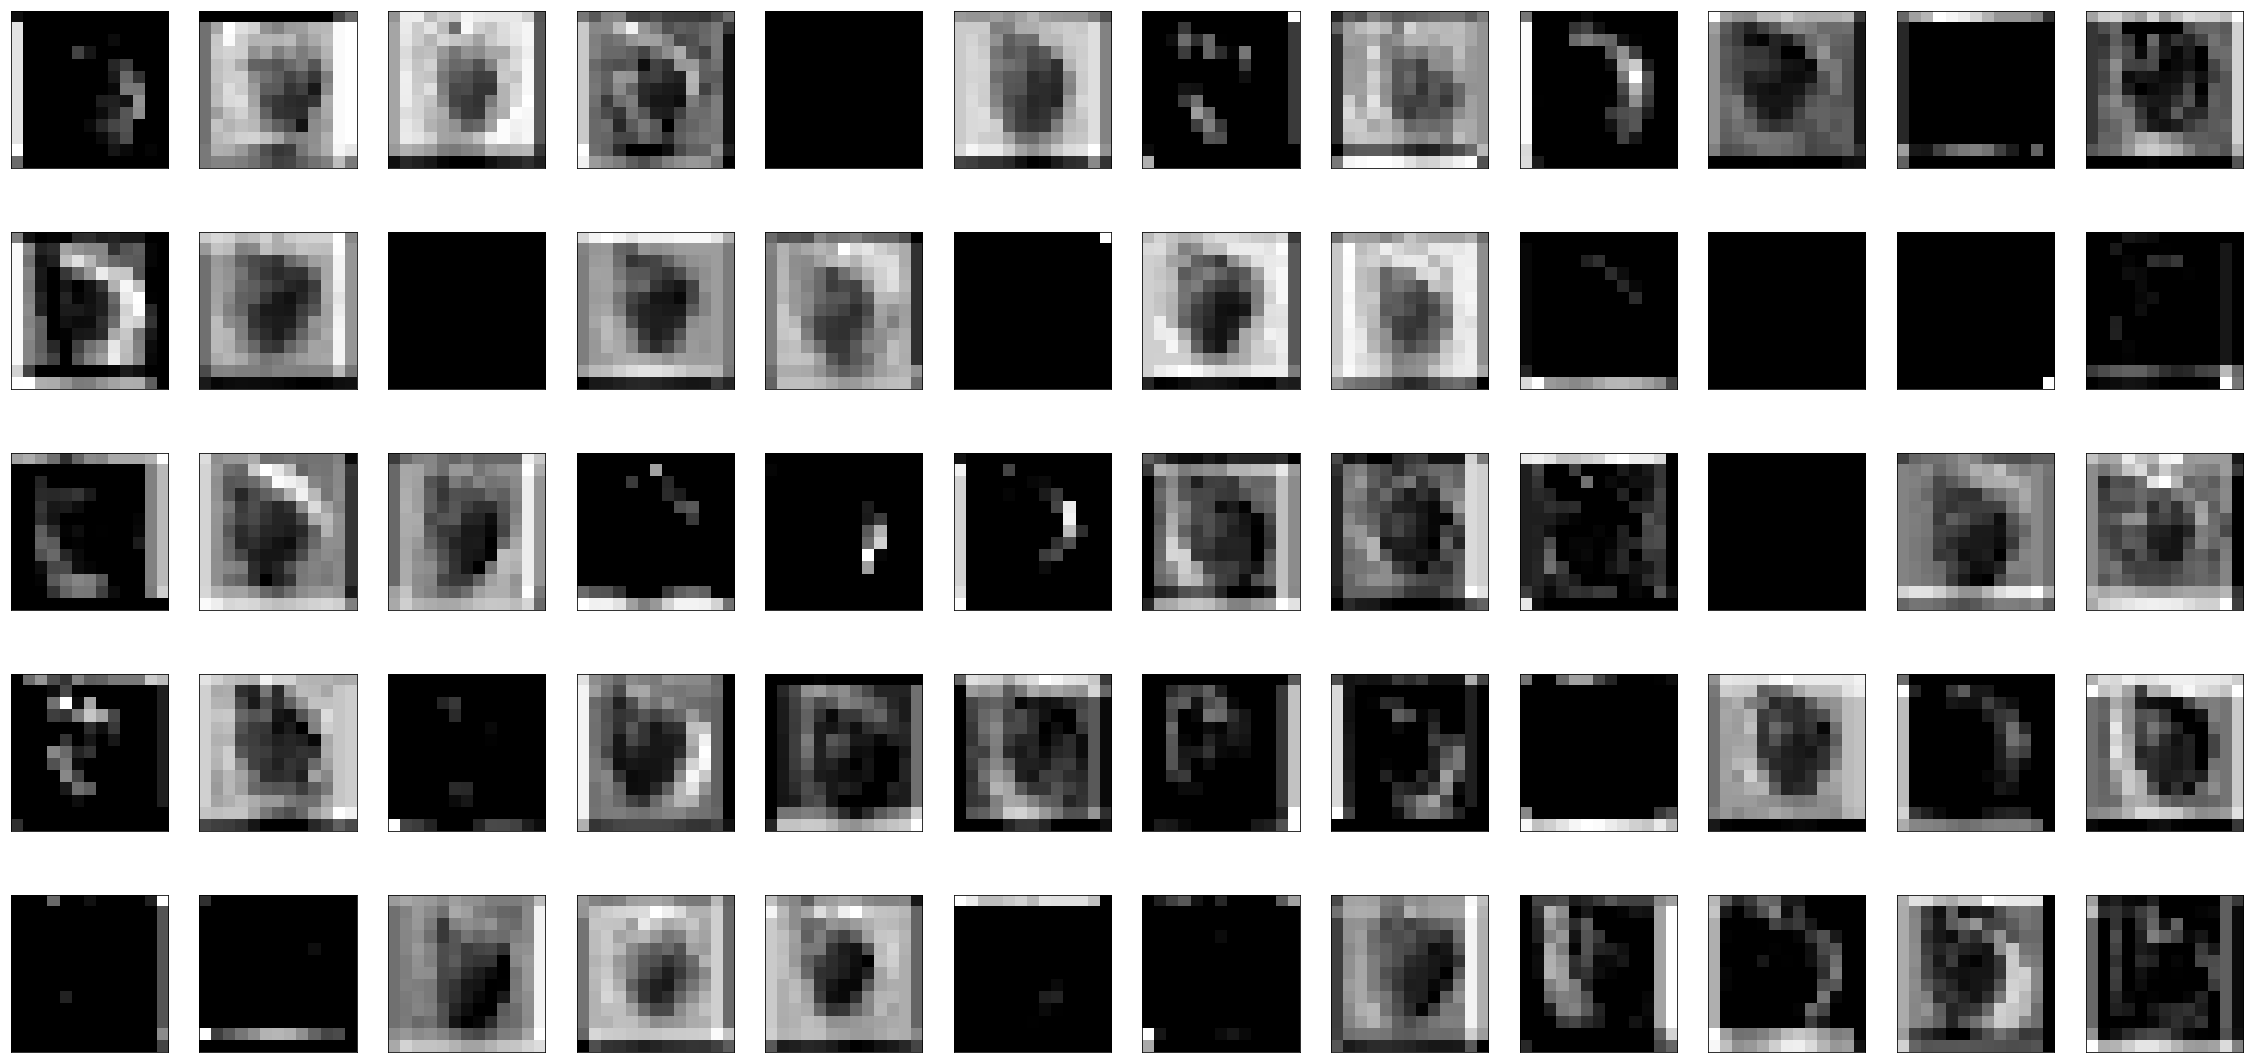

In [556]:
fig = plt.figure(figsize=(40, 40))
for i in range(60):
    ax=fig.add_subplot(10,64/5, i+1)
    p=temp_conv2[0,:,:,i]
    plt.imshow(p, interpolation='nearest',cmap=plt.get_cmap('gray'))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show()

In [599]:

writer=tf.summary.FileWriter('/home/ppatnaik/pradosa/2')
writer.add_graph(sess.graph)

In [598]:
import tensorboard

ModuleNotFoundError: No module named 'tensorboard'

In [596]:
import platform
print(platform.python_version())

3.6.1


In [84]:
from matplotlib import pyplot as plt
plt.imshow(w, interpolation='nearest')
plt.show()


TypeError: Cannot handle this data type

In [38]:

  # scale weights to [0 255] and convert to uint8 (maybe change scaling?)
x_min = tf.reduce_min(w)
x_max = tf.reduce_max(w)
weights_0_to_1 = (w - x_min) / (x_max - x_min)
weights_0_to_255_uint8 = tf.image.convert_image_dtype (weights_0_to_1, dtype=tf.uint8)

#   # to tf.image_summary format [batch_size, height, width, channels]
weights_transposed = tf.transpose (weights_0_to_255_uint8, [3, 0, 1, 2])

#   # this will display random 3 filters from the 64 in conv1

In [55]:
weights_transposed

<tf.Tensor 'transpose_4:0' shape=(32, 5, 5, 1) dtype=uint8>

In [41]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL

image_tensor = conv1
jpeg_bin_tensor = tf.image.encode_jpeg(weights_transposed[0])

with tf.Session() as sess:
    # display encoded back to image data
    jpeg_bin = sess.run(jpeg_bin_tensor)
    jpeg_str = StringIO.StringIO(jpeg_bin)
    jpeg_image = PIL.Image.open(jpeg_str)
    plt.imshow(jpeg_image)

FailedPreconditionError: Attempting to use uninitialized value Variable_40
	 [[Node: Variable_40/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_40"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_40)]]

Caused by op 'Variable_40/read', defined at:
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-79c9bb0ec22c>", line 1, in <module>
    prediction,weights = convolutional_neural_network(x)
  File "<ipython-input-29-65677de9e912>", line 2, in convolutional_neural_network
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 316, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1338, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/scratch/Anaconda3-4.3.1-Linux-x86_64/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_40
	 [[Node: Variable_40/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_40"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_40)]]


In [57]:
sess = tf.Session()
with sess.as_default():
    array = weights_transposed.eval(sess)
    print (array)


TypeError: input must be a dictionary

In [ ]:
print(type(tf.Session().run(weights_transposed)))

## Funtion to train the network

In [ ]:
def train_neural_network(x):
    prediction,conv1,conv2 = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 1
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

In [187]:
from queue import PriorityQueue

PQ=PriorityQueue()

PQ.put((1,'pradosa'))
PQ.put((2,'anwesha'))
PQ.put((3,'kannan'))

In [188]:
PQ.get()

(1, 'pradosa')

In [189]:
PQ.get()

(2, 'anwesha')

In [190]:
PQ.get()

(3, 'kannan')

In [192]:
PQ.top()

AttributeError: 'PriorityQueue' object has no attribute 'top'